In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head() #Notice that there's some missing data in this dataset, so some feature engineering will be required

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Feature Engineering:

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df = df.dropna() #For simplicity, dropping the entries with any null values will be done, but for the 8 penguins with only the sex missing, you could explore using the other features to fill them in

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df['sex'].unique() #One of the rows has a dot filled in for the sex

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose() #Gathering info about the features of the Gentoo species to prepare to replace the penguin with the dot as the sex
#Culmen length near female avg
#Culmen depth near male avg
#Flipper length halfway between female and male, but leans more towards female due to maxes for the 2 sexes
#Body mass near female (most telling feature)
#Result: Lean female

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [14]:
df.at[336, 'sex'] = 'FEMALE' #The .at method is similar to .loc, but it works in place rather than making a copy

In [15]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

Data Visualizations:

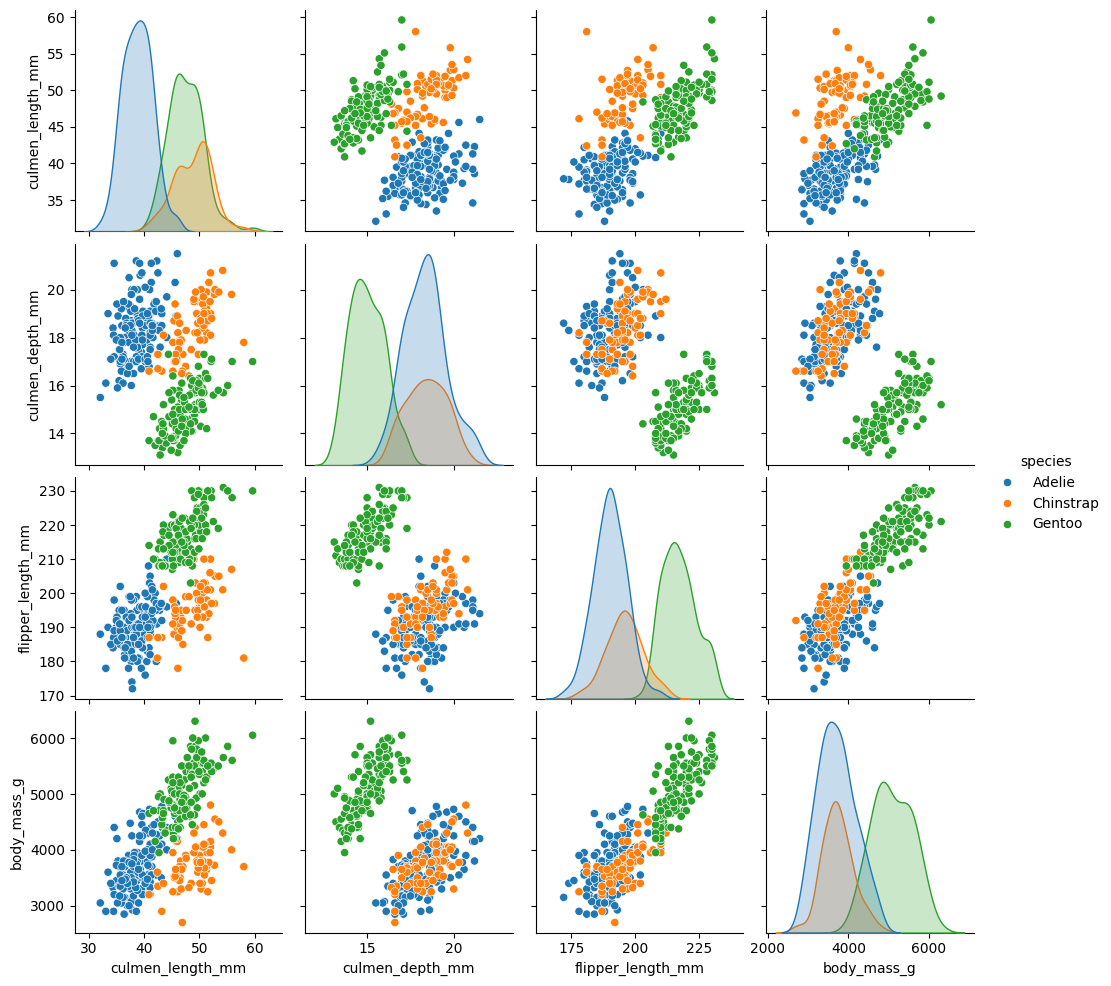

In [16]:
sns.pairplot(df, hue = 'species')

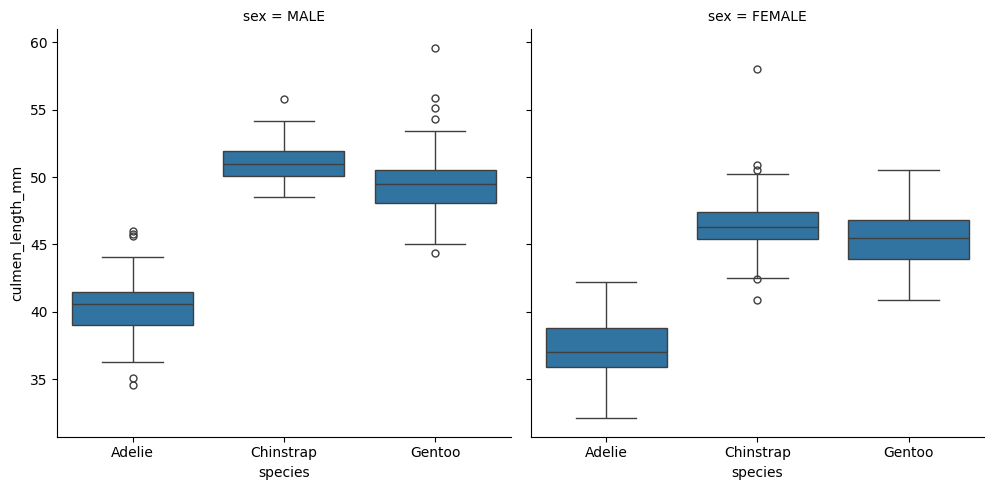

In [17]:
sns.catplot(x = 'species', y = 'culmen_length_mm', data = df, kind = 'box', col = 'sex')

More Feature Engineering:

In [18]:
df['island'] #Currently, scikit-learn doesn't support string type multicategorical features for decision trees, so they will need to be replaced with dummies

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object

In [19]:
pd.get_dummies(df.drop('species', axis = 1), dtype = int, drop_first = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


Data Preparation:

In [20]:
X = pd.get_dummies(df.drop('species', axis = 1), dtype = int, drop_first = True)

In [21]:
y = df['species'] #Since multiple features will never be used at the same time, feature scaling is NOT required!

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

Creating A Default Decision Tree Classifier:

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier()

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

Evaluating The Default Model:

In [27]:
base_preds = model.predict(X_test)

In [28]:
base_preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'

In [29]:
y_test

202    Chinstrap
315       Gentoo
141       Adelie
200    Chinstrap
299       Gentoo
         ...    
263       Gentoo
89        Adelie
210    Chinstrap
23        Adelie
317       Gentoo
Name: species, Length: 101, dtype: object

In [30]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [31]:
print(classification_report(y_test, base_preds))
#This model performed very well, as there was clear separation between the different species of penguins

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



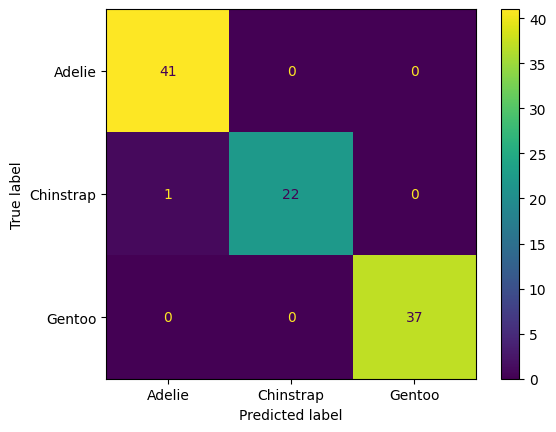

In [32]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [33]:
model.feature_importances_ #These are listed in the same order as the x features

array([0.33609286, 0.04203954, 0.53120101, 0.01085298, 0.0681854 ,
       0.        , 0.0116282 ])

In [34]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [ ]:
pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Feature Importance']).sort_values('Feature Importance')
#WARNING: THE KERNEL MAY CRASH WHEN DOING THIS OR EDITING THIS LINE OF CODE!!!

,Feature Importance
island_Torgersen,0.000000
body_mass_g,0.010853
sex_MALE,0.011628
culmen_depth_mm,0.042040
island_Dream,0.068185
culmen_length_mm,0.336093
flipper_length_mm,0.531201


In [37]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.633\nsamples = 233\nvalue = [105, 45, 83]'),
 Text(0.2727272727272727, 0.75, 'x[0] <= 42.35\ngini = 0.418\nsamples = 147\nvalue = [104, 42, 1]'),
 Text(0.38636363636363635, 0.8333333333333333, 'True  '),
 Text(0.18181818181818182, 0.5833333333333334, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[4] <= 0.5\ngini = 0.274\nsamples = 50\nvalue = [7.0, 42.0, 1.0]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[6] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 0, 1]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 44.2\ngini = 0.045\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.45454545454545453, 0.25, 'x[3] <= 3850.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gi

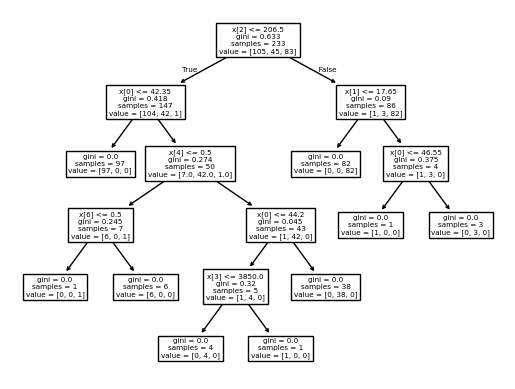

In [ ]:
plot_tree(model) #Scroll past the text to get to the figure of the decision tree

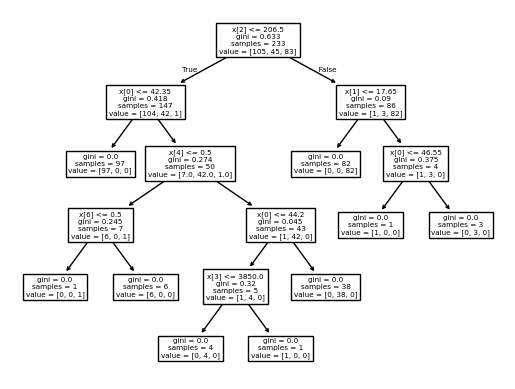

In [39]:
plot_tree(model); #Just like with matplotlib and seaborn figures, a semicolon suppresses the preceding text

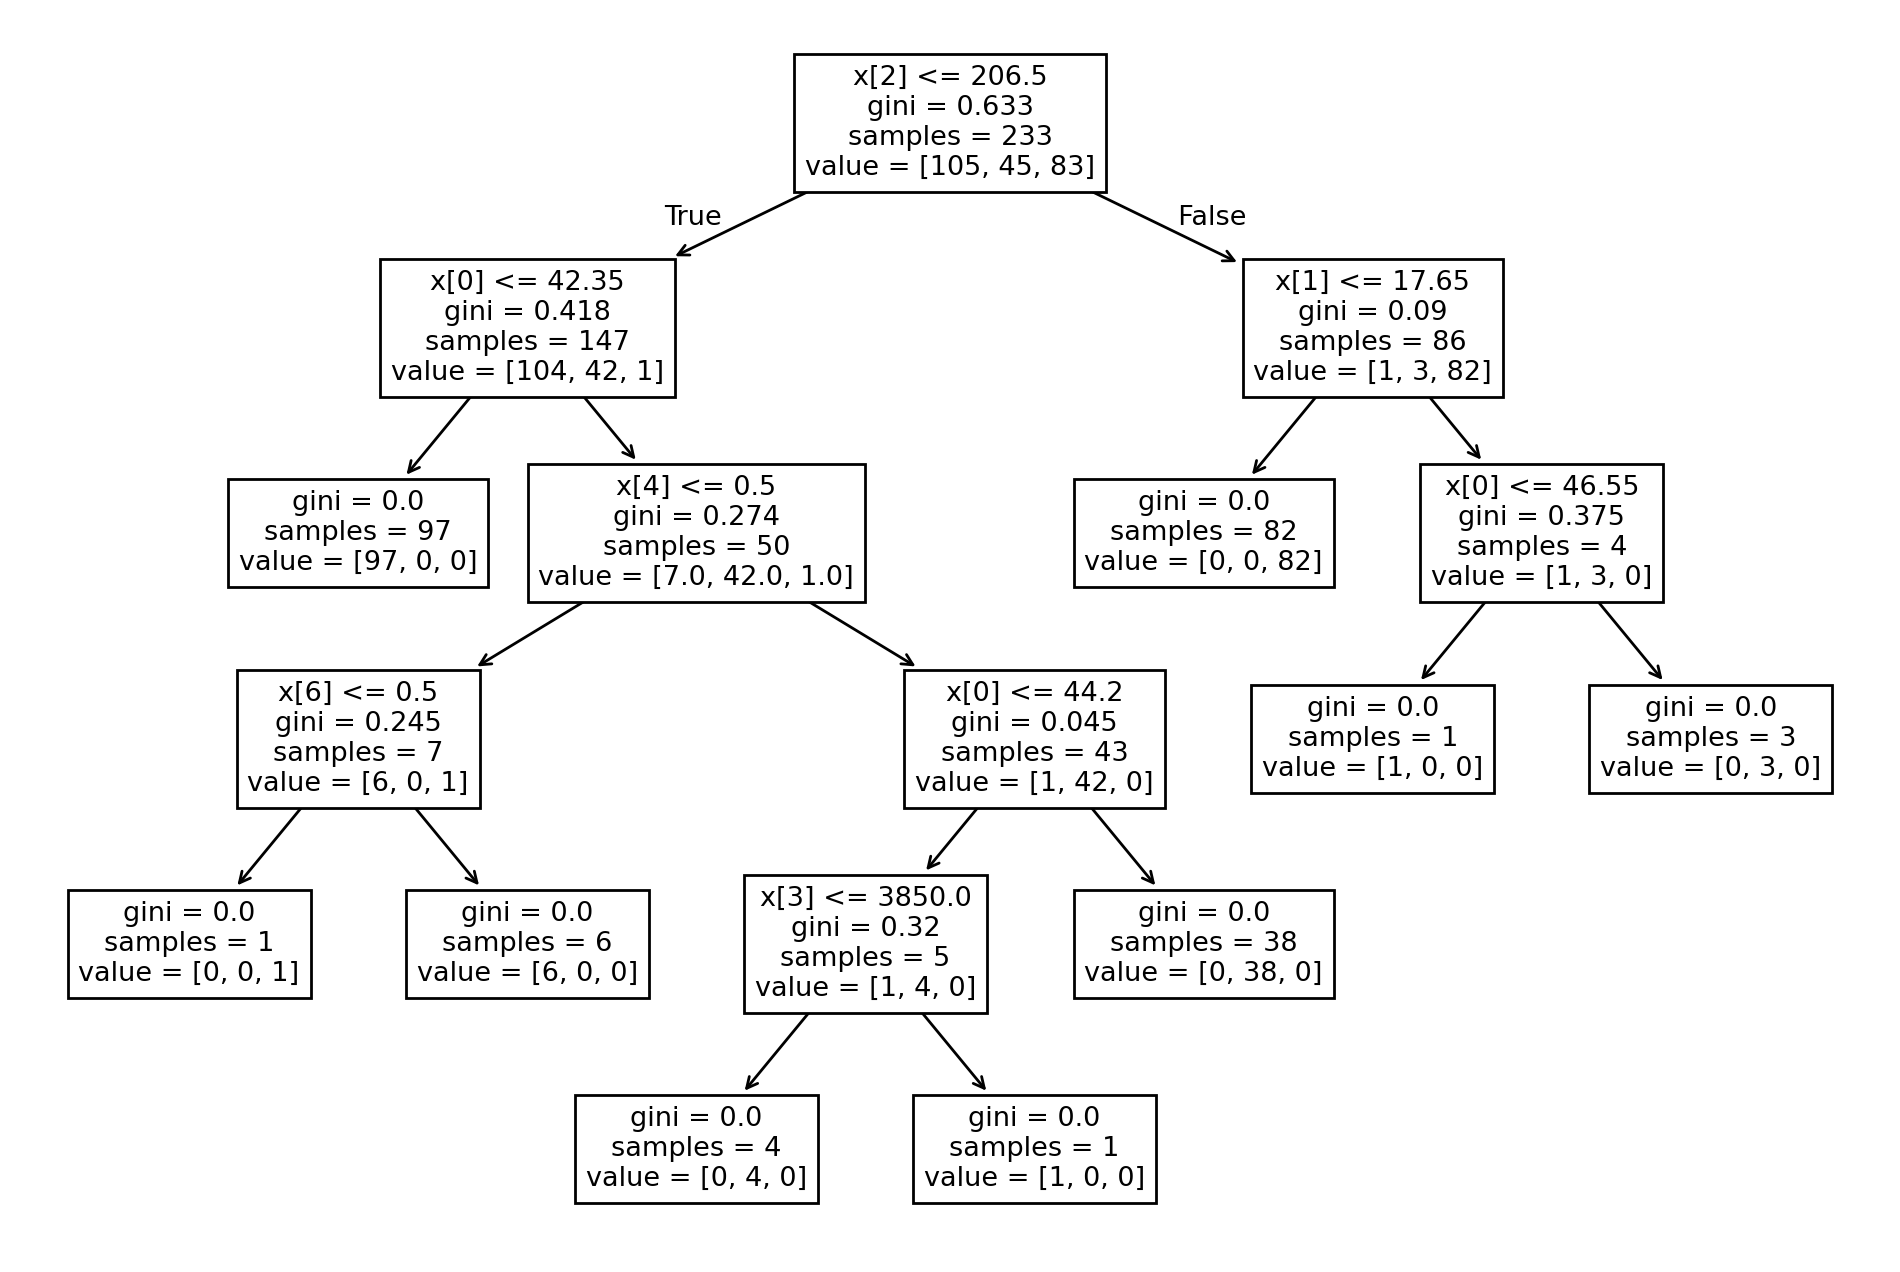

In [41]:
plt.figure(figsize = (12, 8), dpi = 200) #Decision tree plots also have matplotlib figure features
plot_tree(model);

In [42]:
X_train #The indeces of x seen throughout the decision tree figure correspond to that column's index in X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
194,50.9,19.1,196.0,3550.0,1,0,1
22,35.9,19.2,189.0,3800.0,0,0,0
92,34.0,17.1,185.0,3400.0,1,0,0
149,37.8,18.1,193.0,3750.0,1,0,1
156,52.7,19.8,197.0,3725.0,1,0,1
...,...,...,...,...,...,...,...
81,42.9,17.6,196.0,4700.0,0,1,1
93,39.6,18.1,186.0,4450.0,1,0,1
69,41.8,19.4,198.0,4450.0,0,1,1
335,55.1,16.0,230.0,5850.0,0,0,1


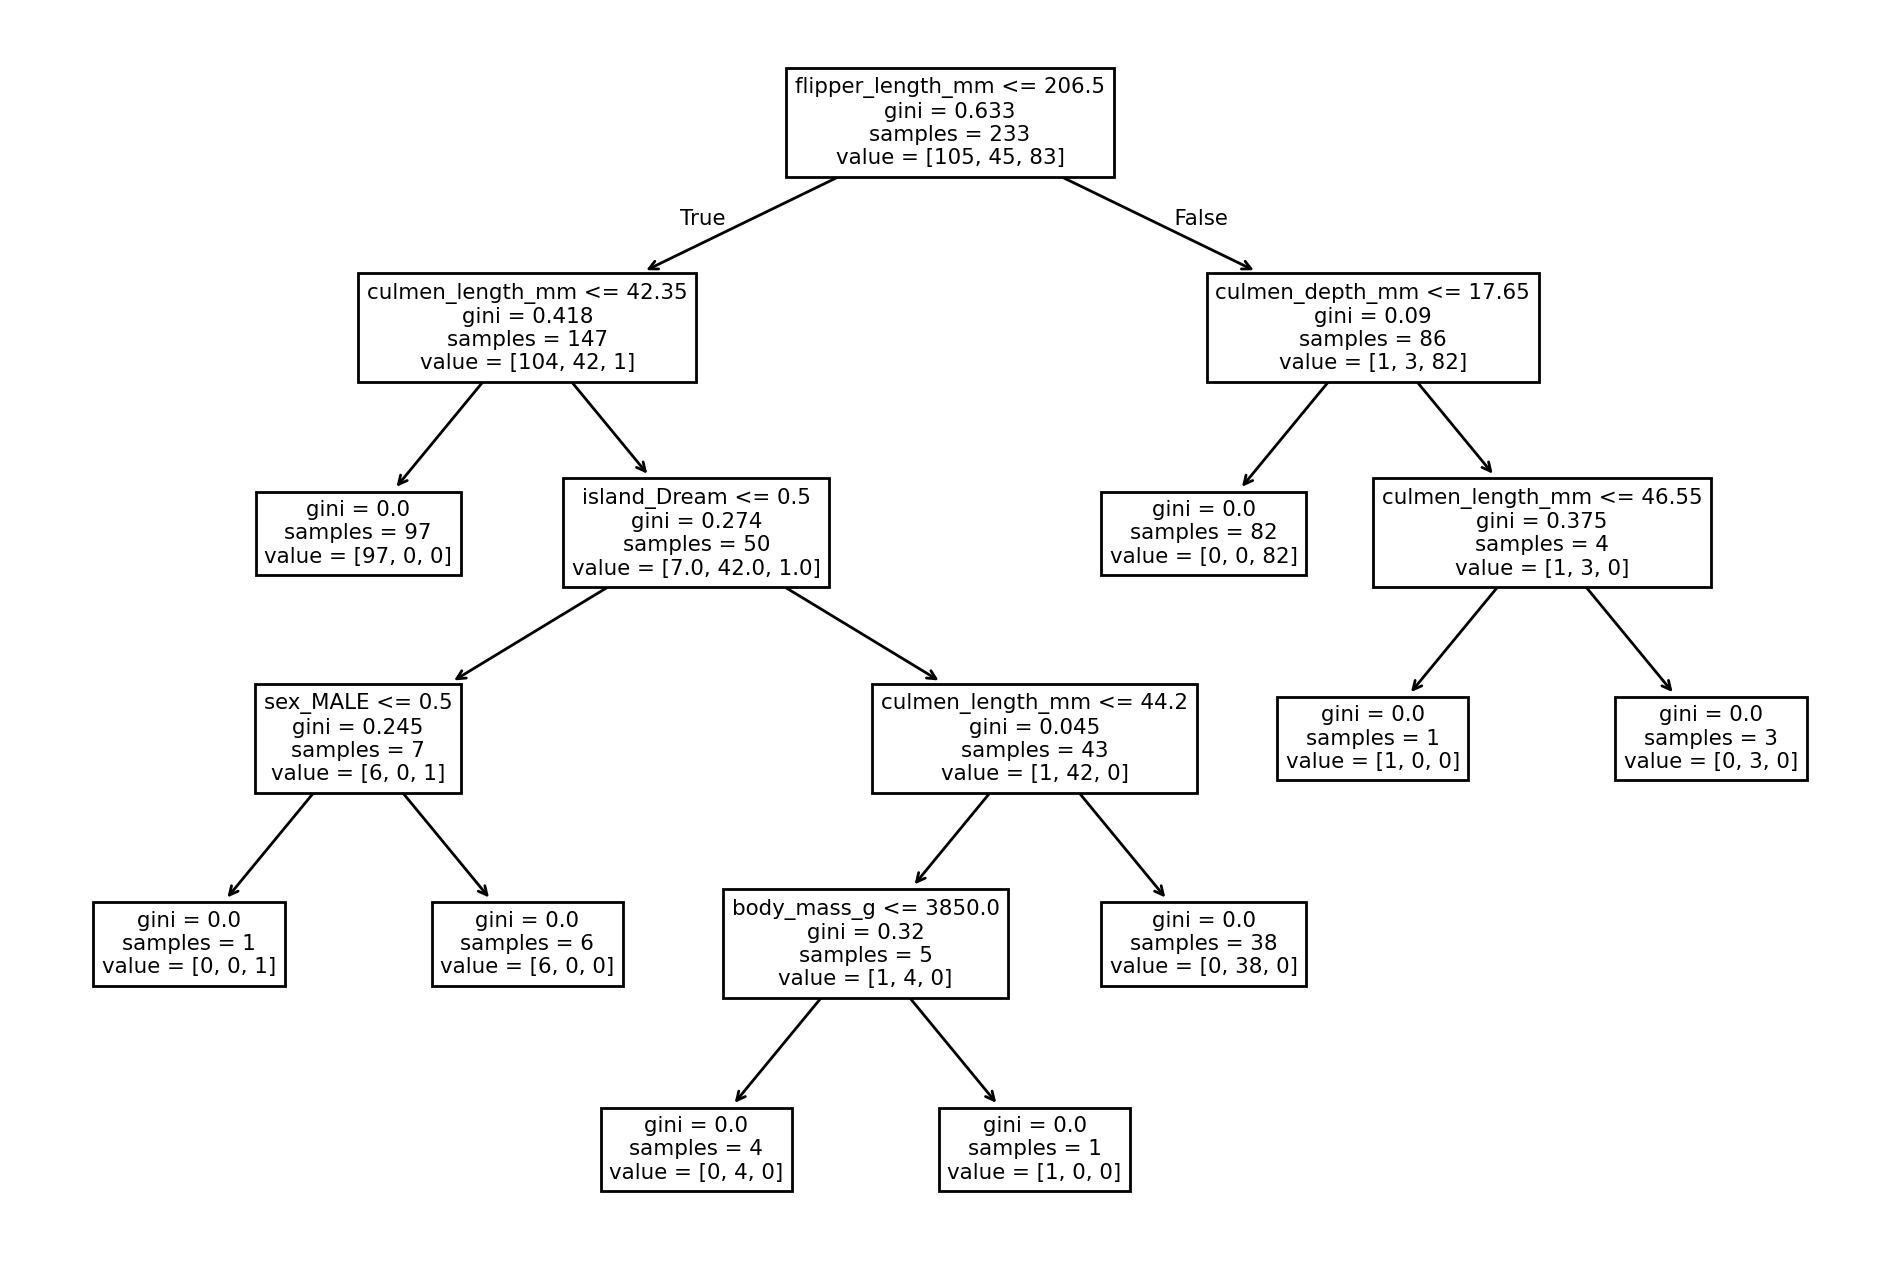

In [43]:
plt.figure(figsize = (12, 8), dpi = 200)
plot_tree(model, feature_names = X.columns);
#The feature_names parameter switches the notation of the features being used at each node to whatever you want, in this case, the column names

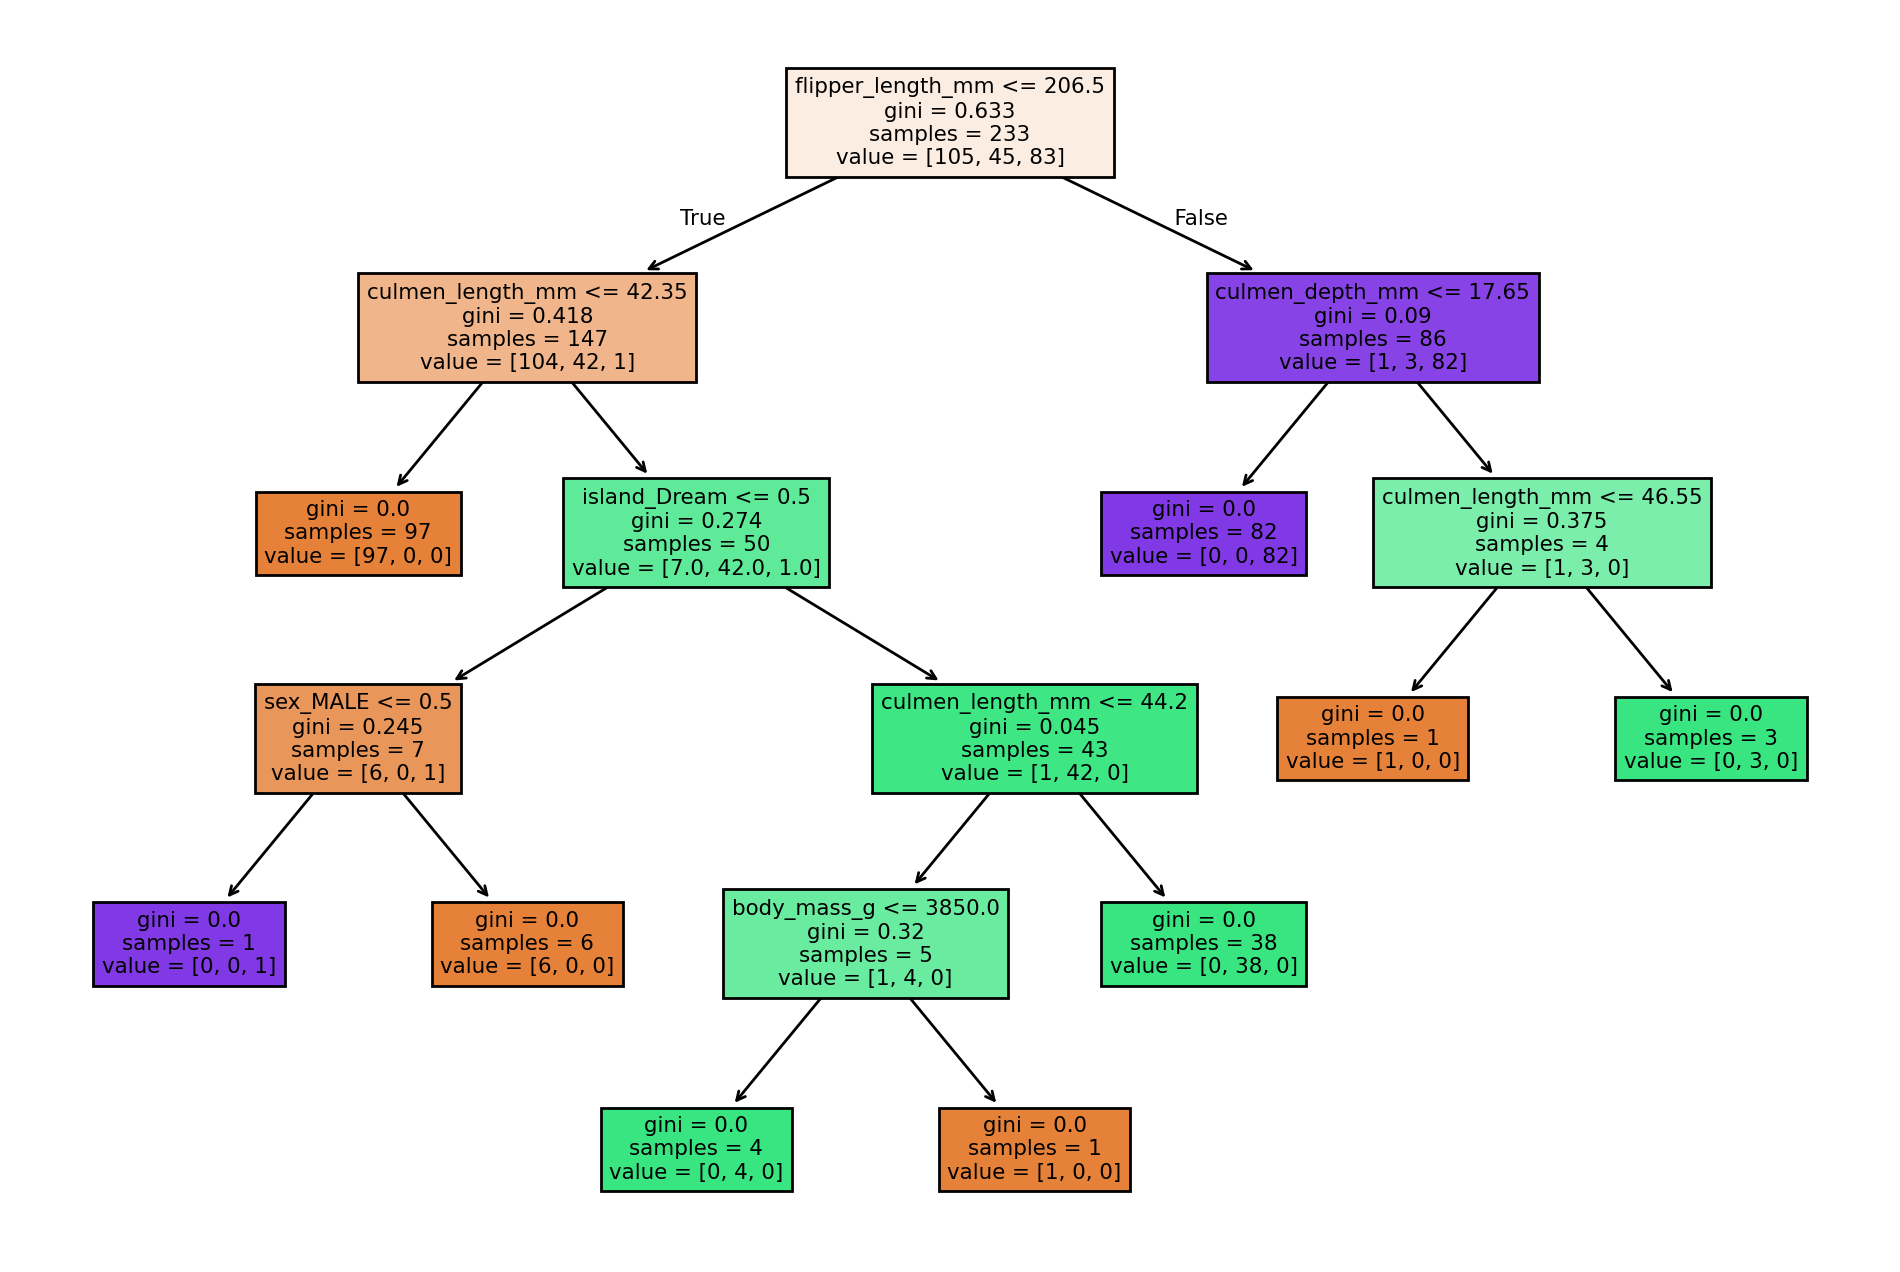

In [44]:
plt.figure(figsize = (12, 8), dpi = 200)
plot_tree(model, feature_names = X.columns, filled = True);
#The filled parameter colors each node by the feature being tested

In [45]:
len(X_train) #Notice the 'samples' property of each node; That's the number of entries enterring a particular node
#Likewise, the 'value' property keeps track of how many of each label as you continue through the tree
#The value property should be all zeroes except one class at a leaf node

233

In [ ]:
def report_model(model): #A convenience function that reports both the classification report and a diagram of the decision tree
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize = (12, 8), dpi = 200)
    plot_tree(model, feature_names = X.columns, filled = True);

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101





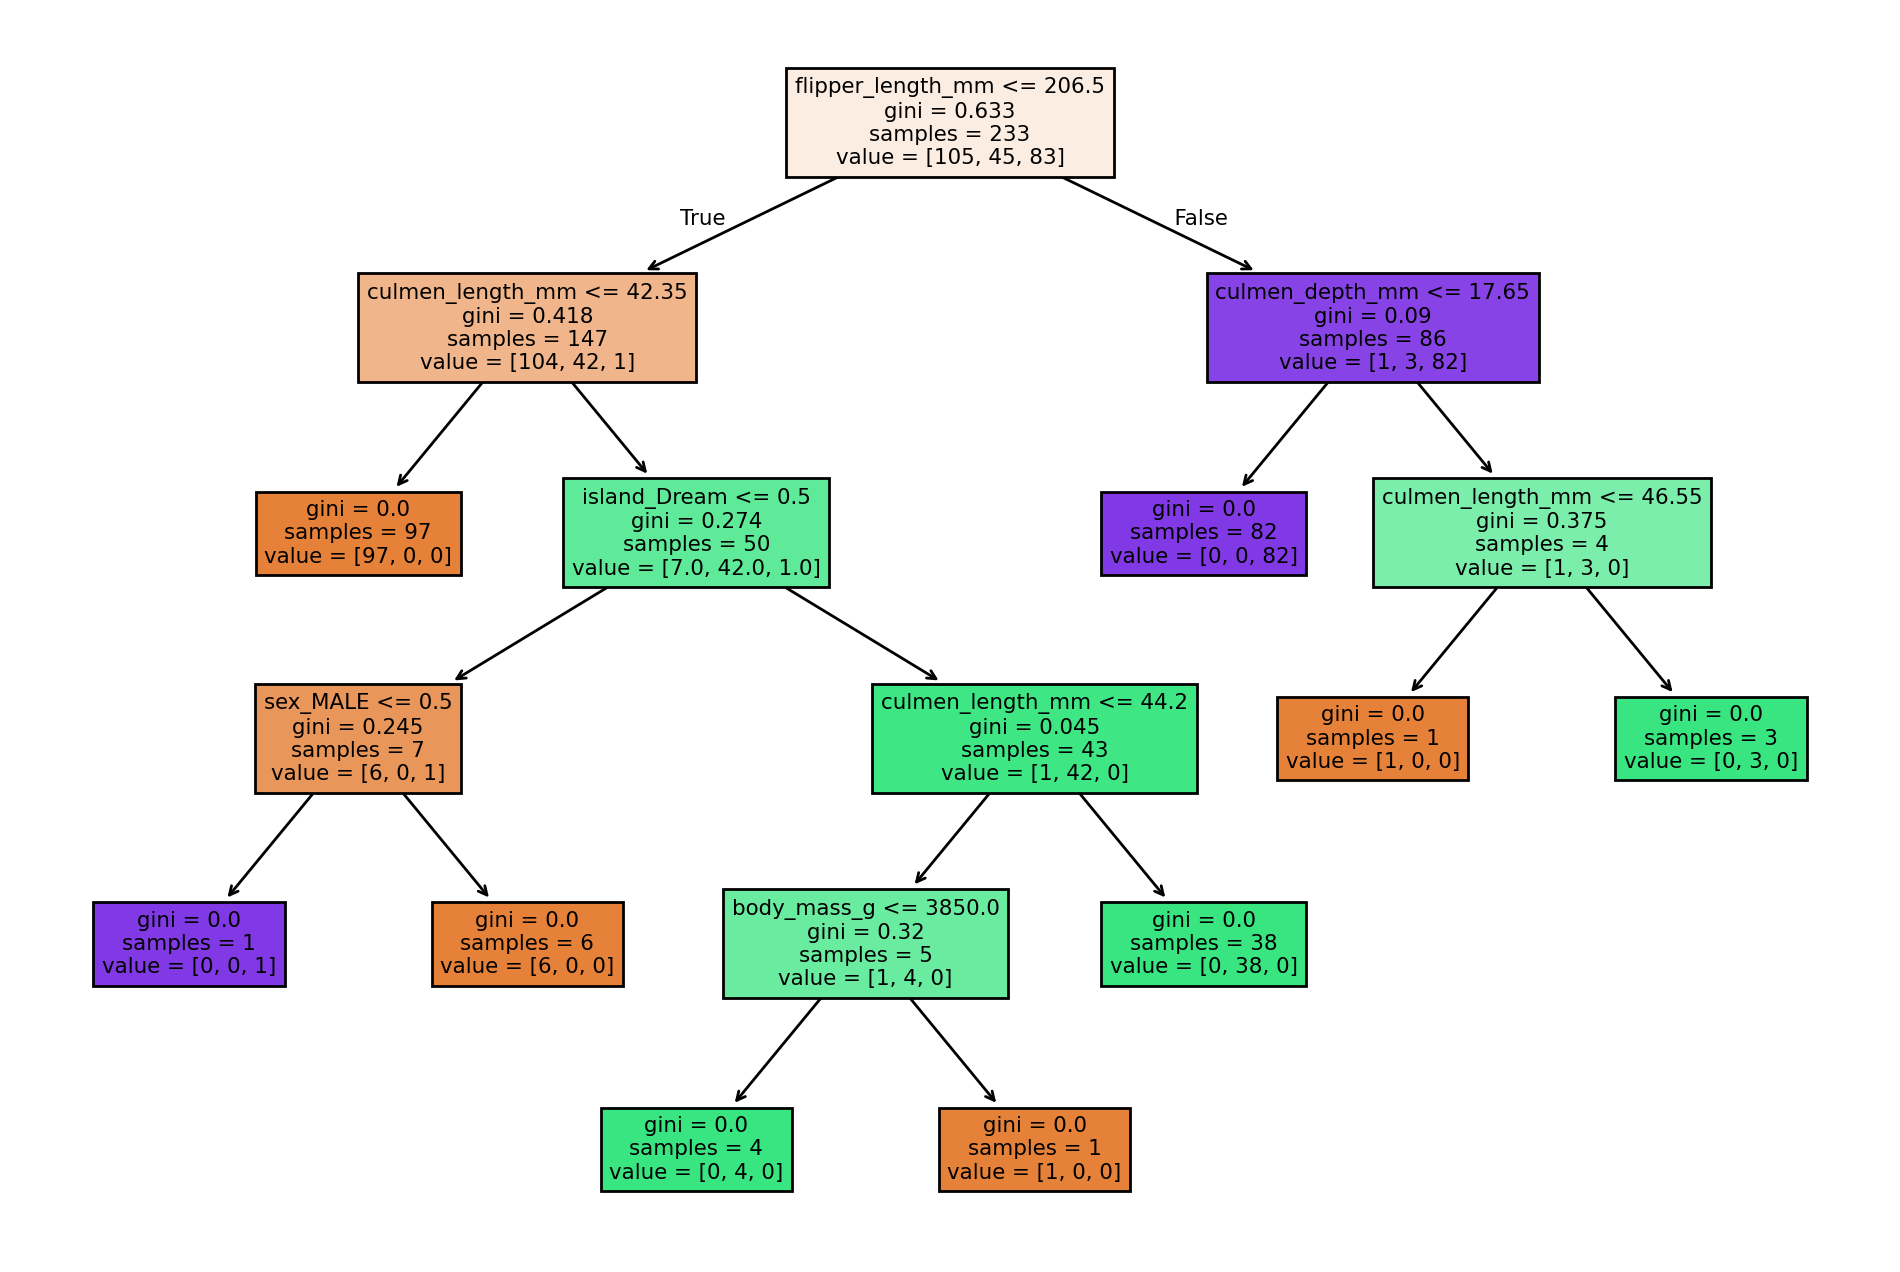

In [47]:
report_model(model)

Decision Tree Hyperparameters:

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)
#The max_depth parameter limits the depth of the decision tree up to a certain level of splits

In [49]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





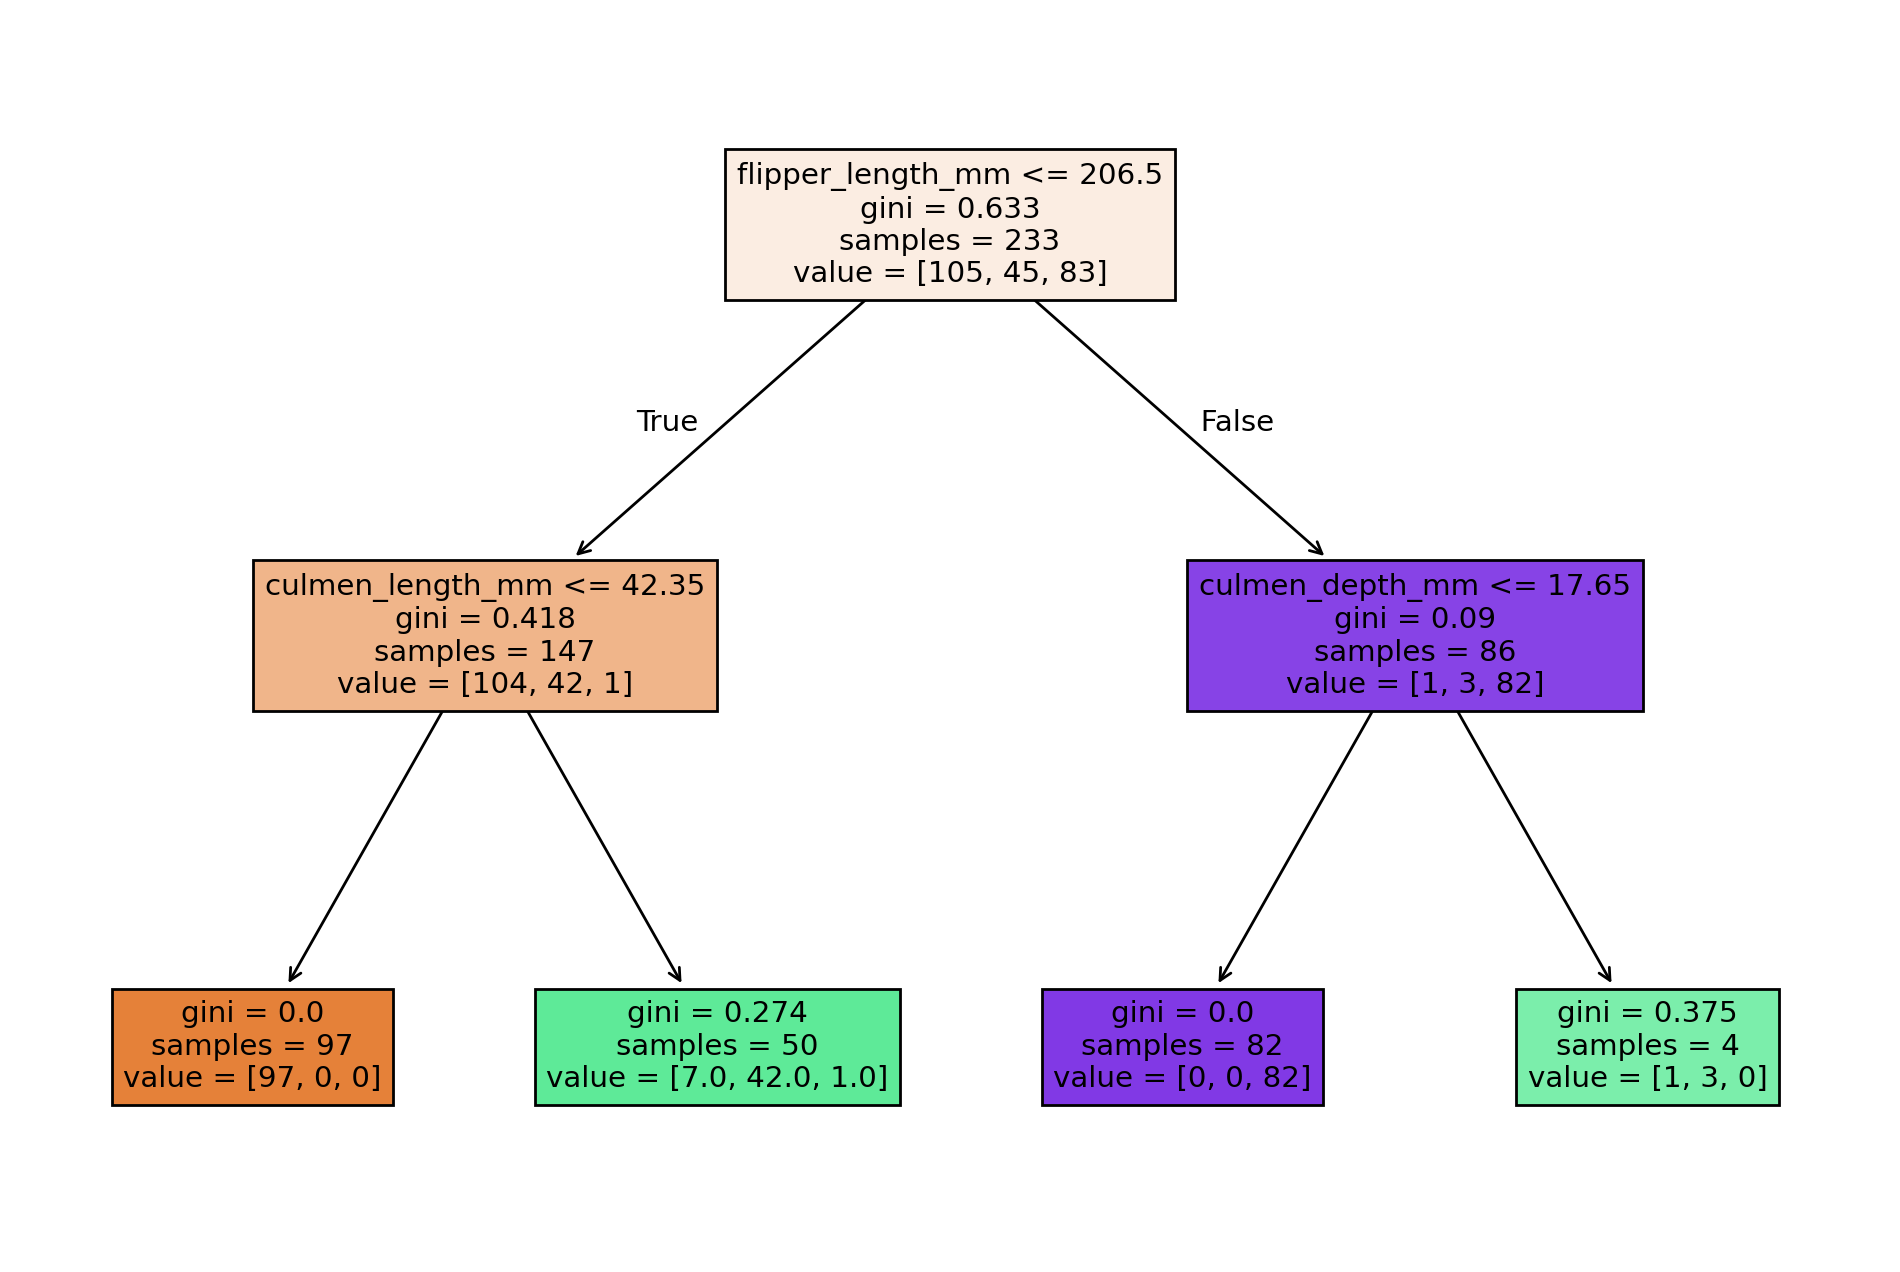

In [50]:
report_model(pruned_tree)

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth = 3)
#Setting a max depth helps to prevent overfitting

In [52]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





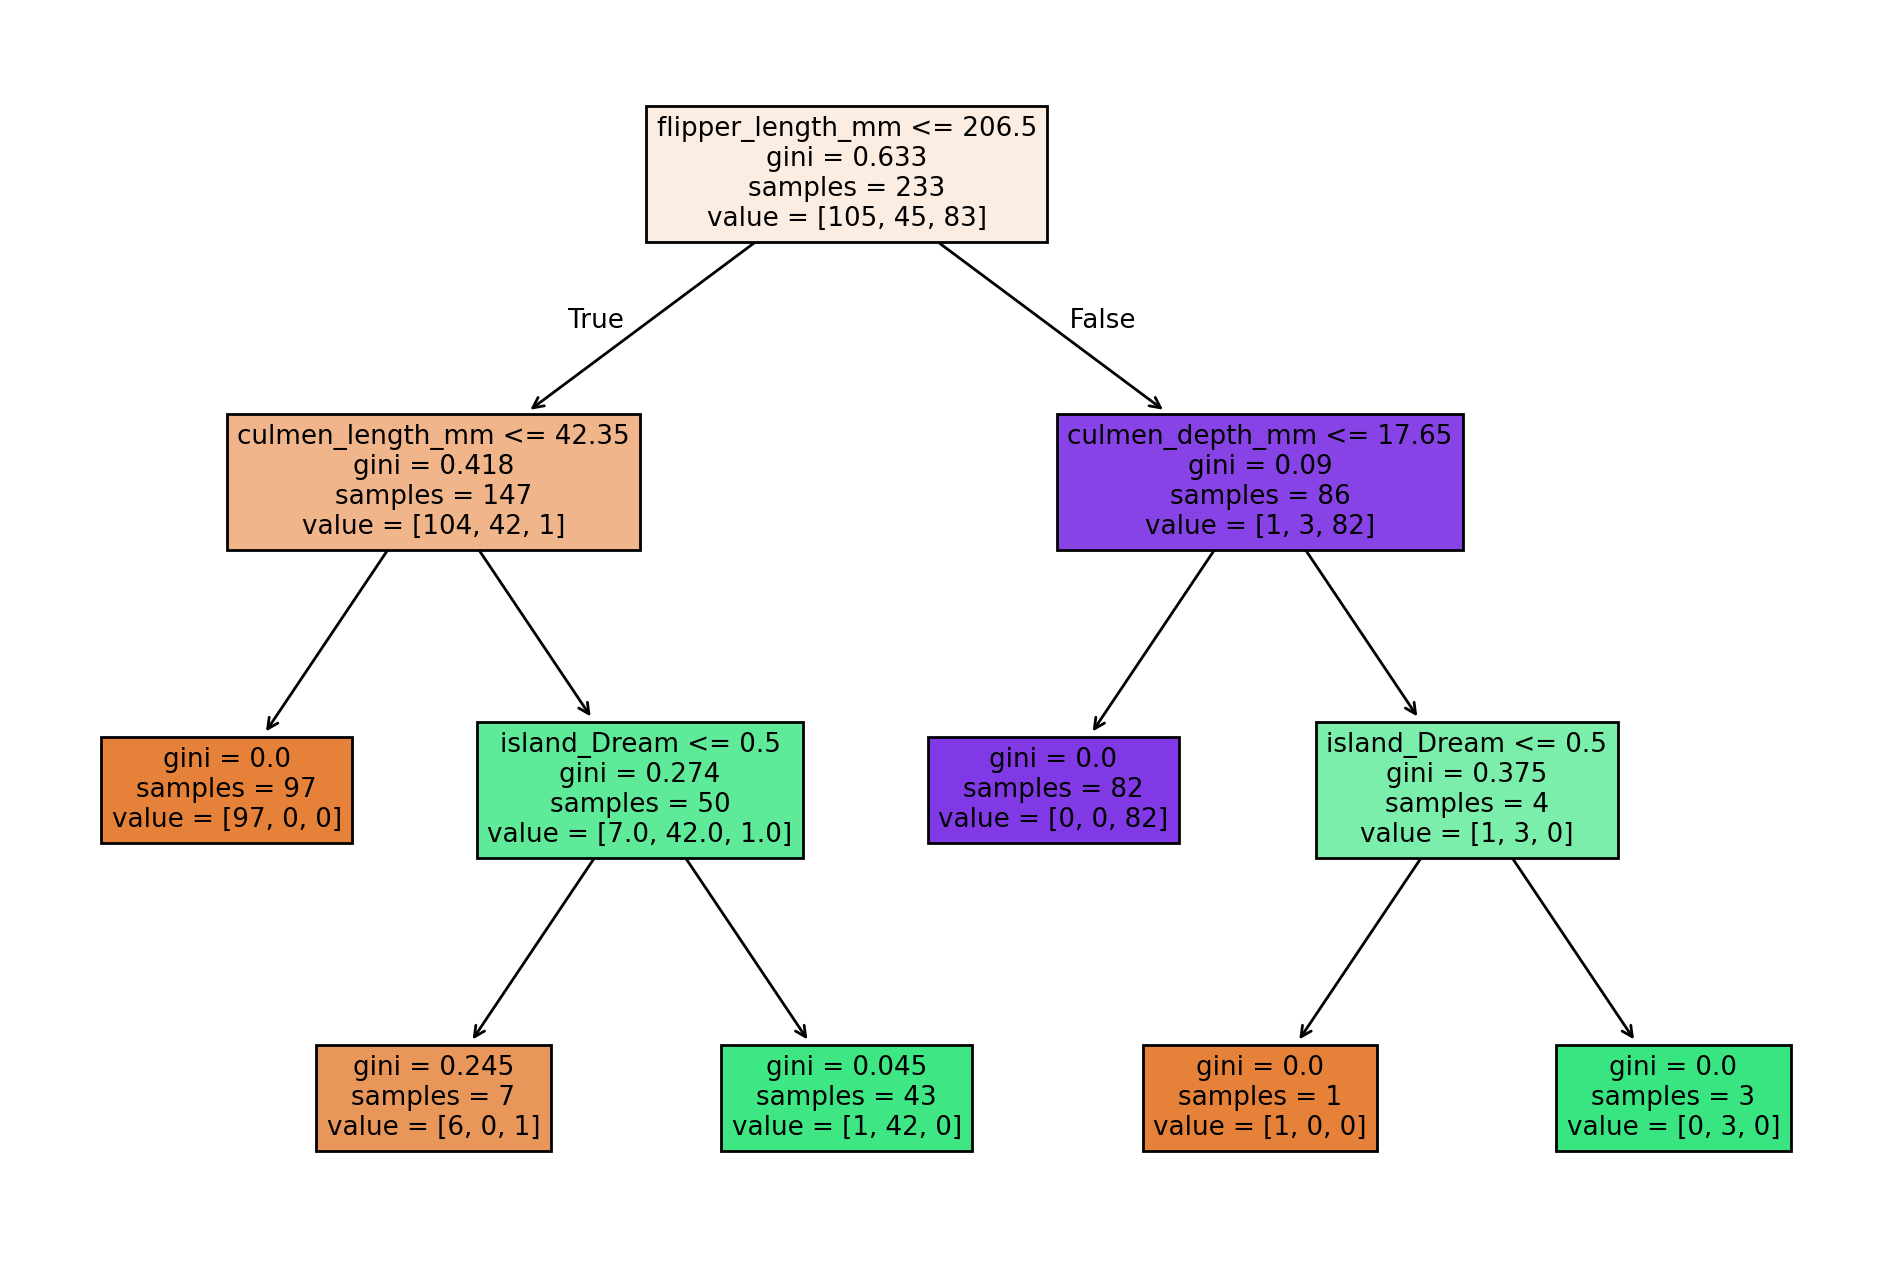

In [53]:
report_model(pruned_tree)

In [54]:
pruned_tree = DecisionTreeClassifier(max_depth = 13)
#Keep in mind that setting a max depth doesn't guarantee that your decision tree will reach that level

In [55]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





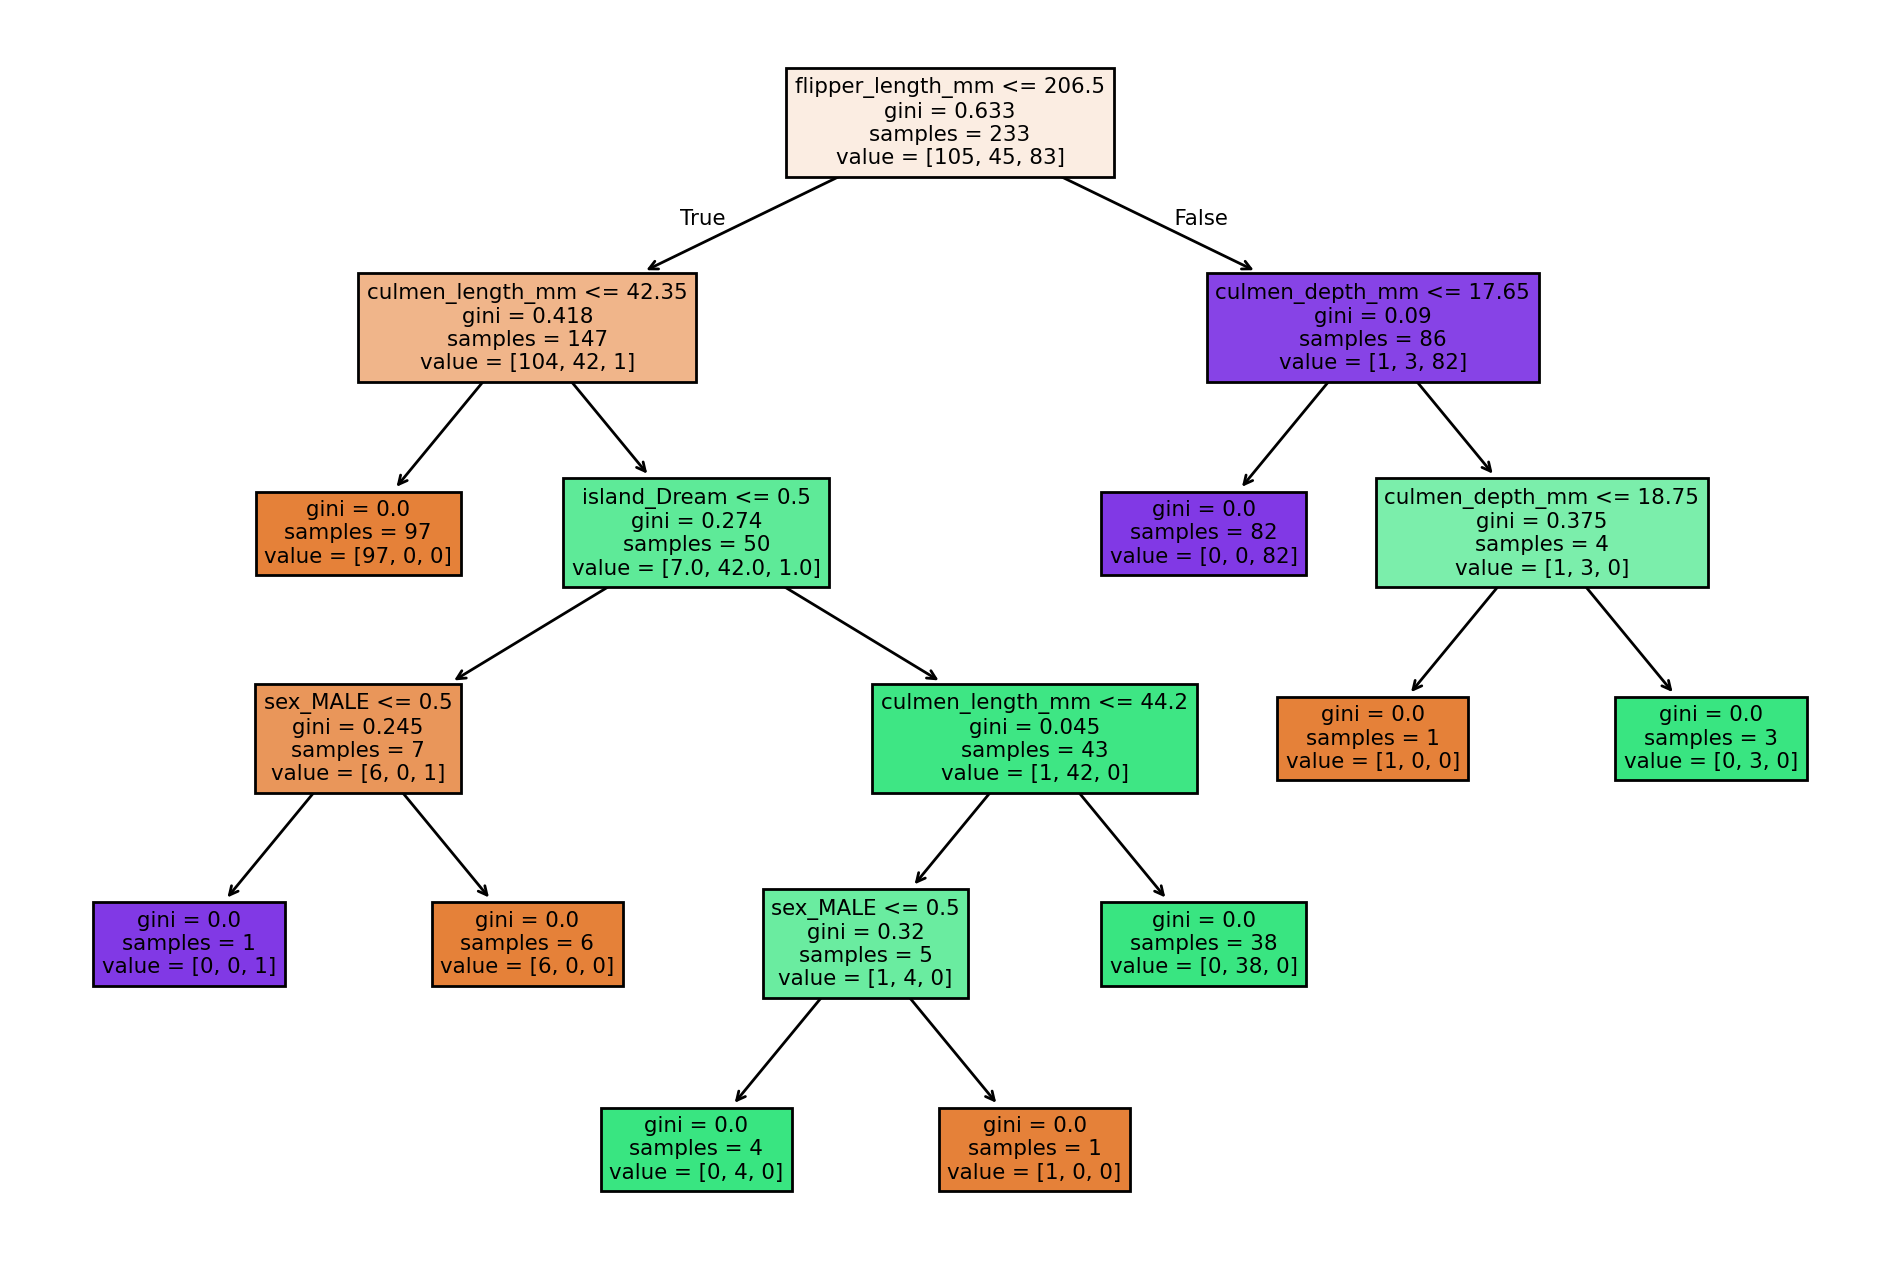

In [56]:
report_model(pruned_tree)

In [ ]:
help(DecisionTreeClassifier) #According to the help docstring, there is no default max depth for decision trees
#You can also set the minimum number of samples required to split an internal node via the min_samples_split parameter

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [58]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)
#The max_leaf_nodes parameter sets the maximum number of leaf nodes the tree can lead to
#As there are 3 classes, this is really constraining this particular tree

In [59]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





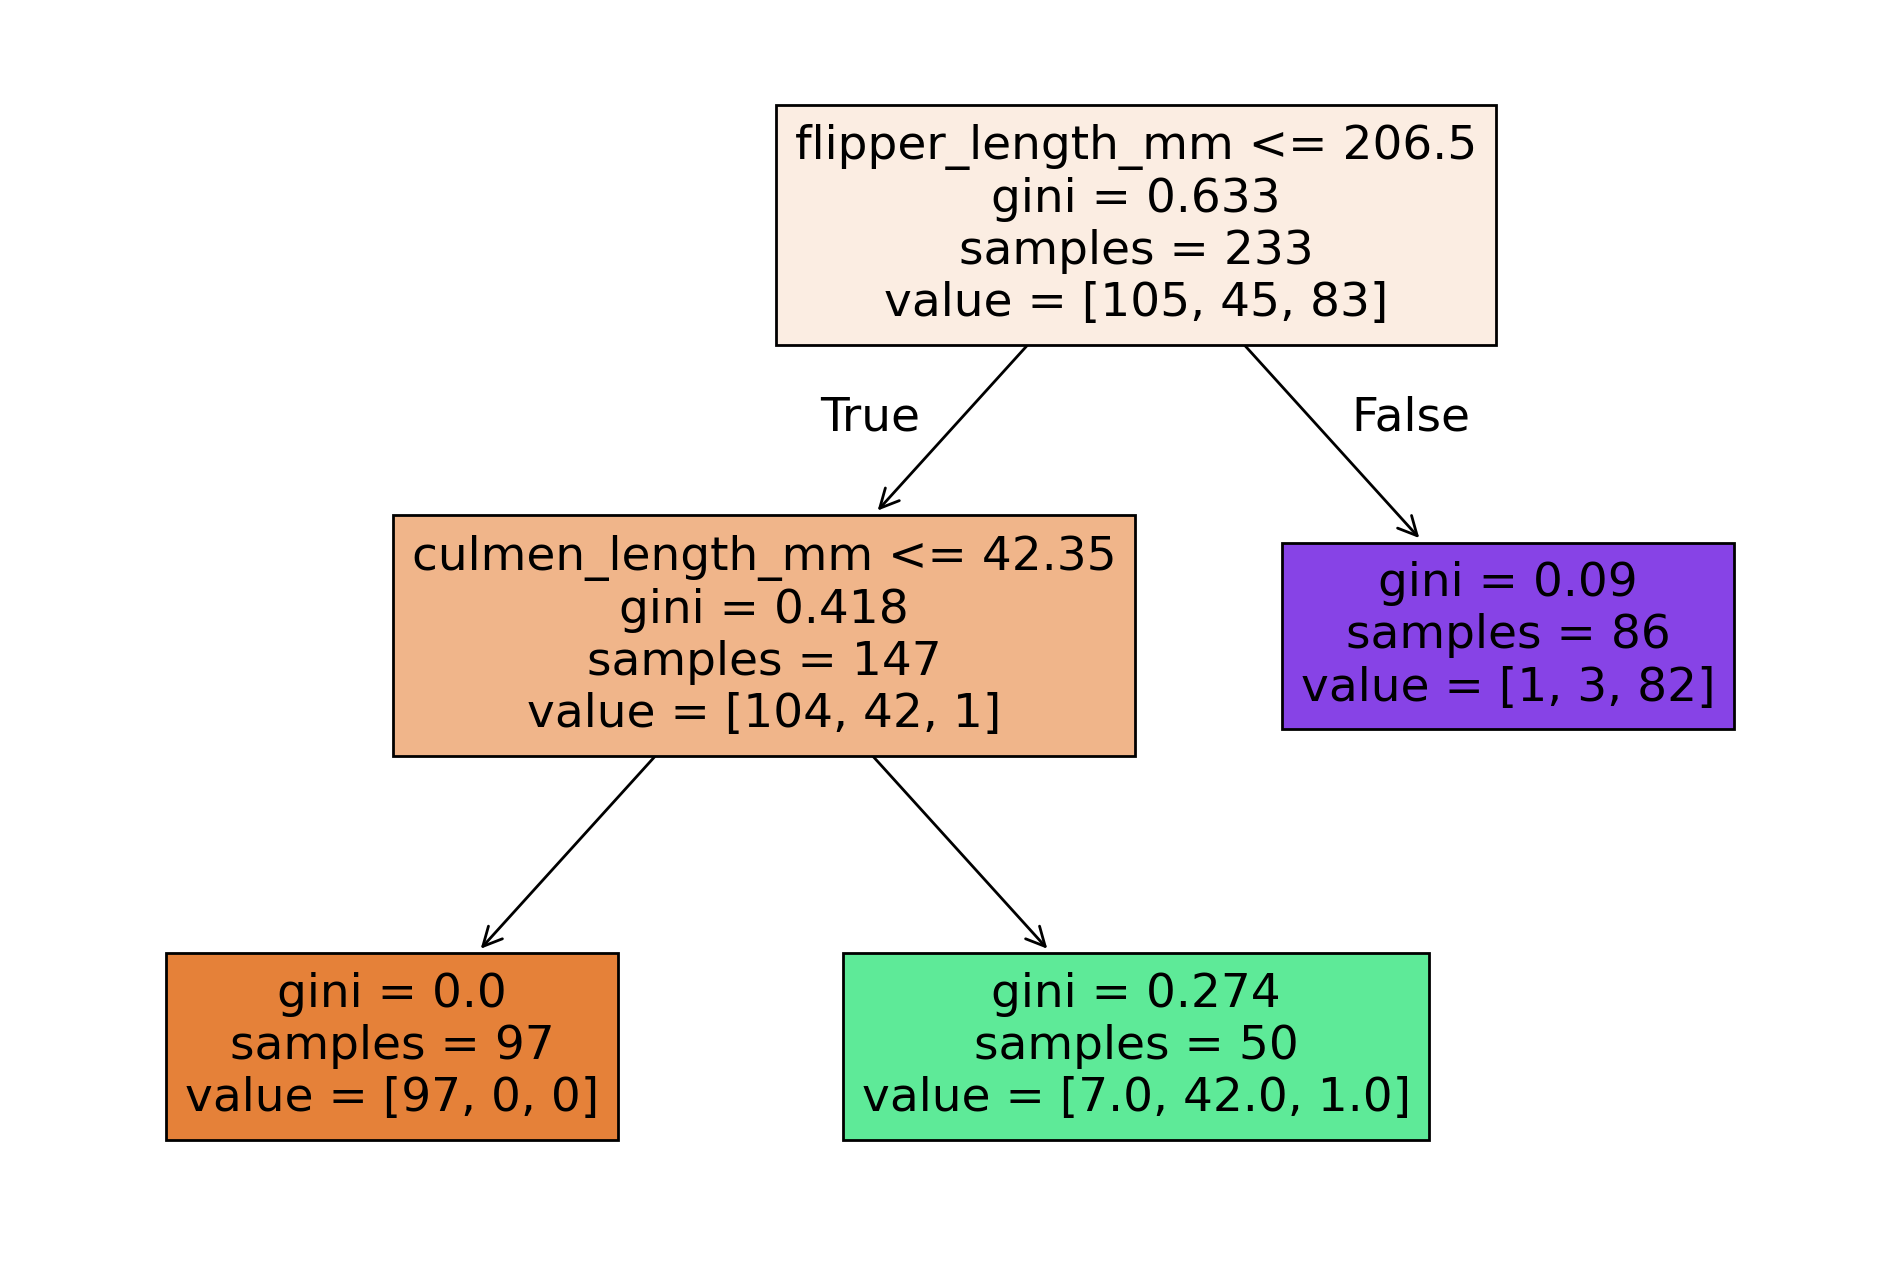

In [60]:
report_model(max_leaf_tree)

In [61]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
#The criterion parameter selects the mathematical criterion for every split; by default, this is 'gini' impurity
#Entropy = Information Gain

In [62]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        41
   Chinstrap       1.00      0.87      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.98      0.96      0.96       101
weighted avg       0.97      0.97      0.97       101





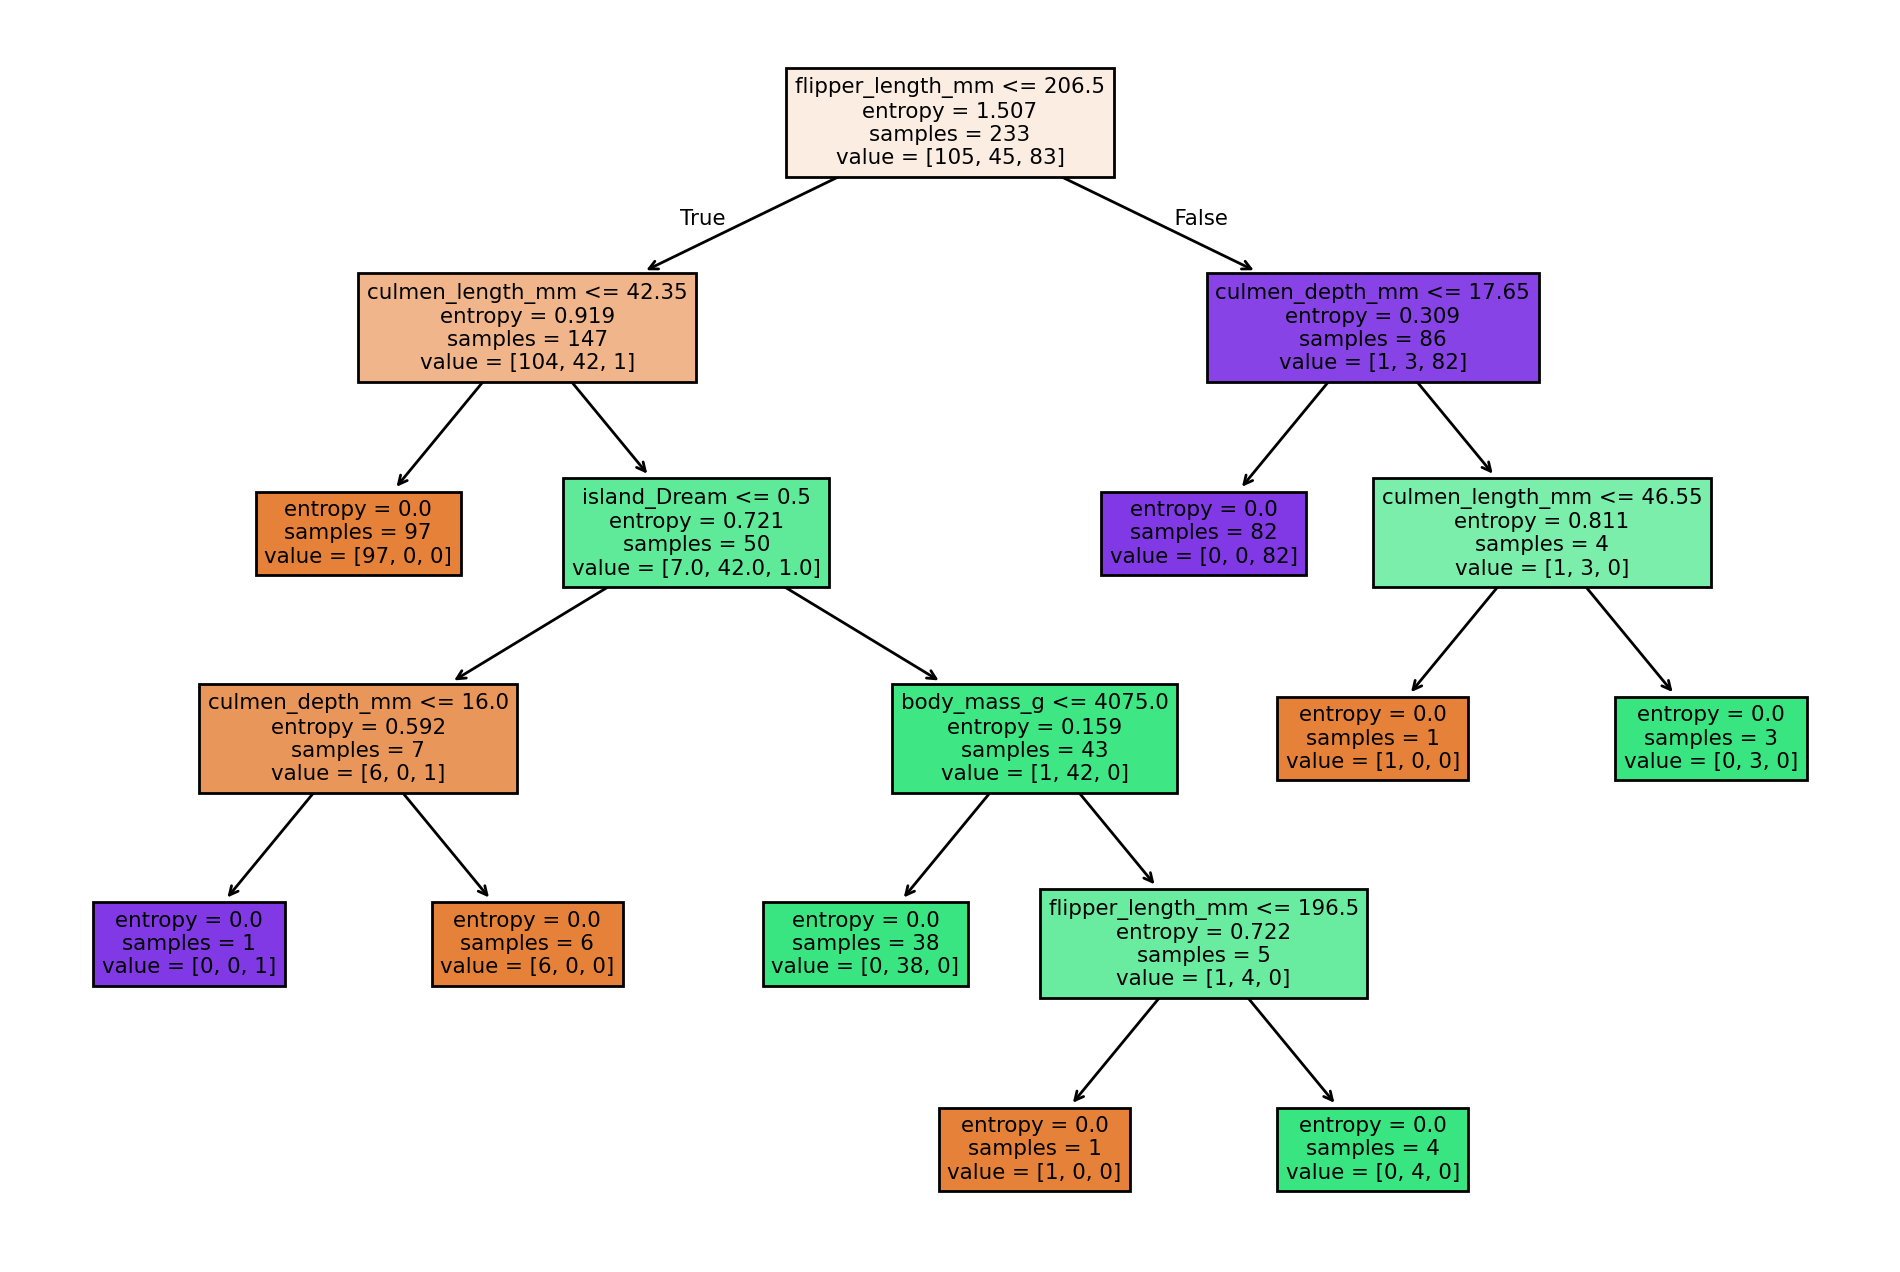

In [63]:
report_model(entropy_tree)